# Uber Data Analysis | Exploratory Data Analysis (EDA)

### Objective:
### To uncover meaningful patterns, perform data cleaning, and derive actionable insights through a detailed analysis of the dataset.

### Scope:

### Identify trends and outliers

### Clean and preprocess raw data

### Visualize and interpret key statistics

### Created by: Kiran S Radhakrishnan
### Dataset Source: Uber Data Analytics – Kaggle

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


In [2]:
import kagglehub
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Download latest version
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/uber-ride-analytics-dashboard


In [3]:
df = pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')

In [4]:
# Let's print the top 5 from the CSV file and look for what all things we have.
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [5]:
#lets check the info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df['Cancelled Rides by Driver'].value_counts()

Cancelled Rides by Driver
1.0    27000
Name: count, dtype: int64

#### There are a lot of null values. If we are trying to drop the NaN or NA values. it will significantly reduce the size of the dataset. Instead, we need to do something. 

# Data Cleaning

### We are addressing missing values in the dataframe. To maintain consistency and avoid null entries, any NaN values in these fields will be replaced with the placeholder "Unknown Reason".

## Checking Unique Values

In [7]:
df['Vehicle Type'].unique()
#There are 7 unique vechicle Types
# This column is good. which indicates all the types of vehicles.

array(['eBike', 'Go Sedan', 'Auto', 'Premier Sedan', 'Bike', 'Go Mini',
       'Uber XL'], dtype=object)

In [8]:
df['Incomplete Rides Reason'].unique()

#There are 4 unique vechicle Types

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

In [9]:
df['Driver Cancellation Reason'].unique()
#df['Reason for cancelling by Customer'].unique()
#df['Cancelled Rides by Customer'].unique()
#df['Cancelled Rides by Driver'].unique()
#uncomment and check the unique values of each of it.

array([nan, 'Personal & Car related issues', 'Customer related issue',
       'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

## Filling the Dataframe with values

In [10]:
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('Reason Unkown')

In [11]:
df['Incomplete Rides Reason'].unique()

array(['Reason Unkown', 'Vehicle Breakdown', 'Other Issue',
       'Customer Demand'], dtype=object)

In [12]:
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('Reason Unkown')

In [13]:
df['Driver Cancellation Reason'].unique()

array(['Reason Unkown', 'Personal & Car related issues',
       'Customer related issue', 'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

In [14]:
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna('Reason Unkown')

In [15]:
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0) # 0 Indicates completed Rides

In [16]:
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0) # 0 Indicates non cancelled Rides

In [17]:
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0) # 0 Indicates non cancelled Rides

In [18]:
df['Reason for cancelling by Customer'].unique()

array(['Reason Unkown', 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [19]:
df['Avg VTAT'].fillna(df['Avg VTAT'].mean(), inplace=True)
df['Avg CTAT'].fillna(df['Avg CTAT'].mean(), inplace=True)
df['Booking Value'].fillna(df['Booking Value'].mean(), inplace=True)
df['Ride Distance'].fillna(df['Ride Distance'].mean(), inplace=True)
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Avg CTAT                           150000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  float64
 11  Reason for cancelling by Customer  1500

## Dropping Unwanted Columns

In [21]:
df2 = df.drop(['Driver Ratings', 'Customer Rating','Date','Booking ID','Booking Status','Customer ID'], axis=1)
# for now, let's drop these columns. And not trying to fill the value with 0, 1, or the mean.

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Time                               150000 non-null  object 
 1   Vehicle Type                       150000 non-null  object 
 2   Pickup Location                    150000 non-null  object 
 3   Drop Location                      150000 non-null  object 
 4   Avg VTAT                           150000 non-null  float64
 5   Avg CTAT                           150000 non-null  float64
 6   Cancelled Rides by Customer        150000 non-null  float64
 7   Reason for cancelling by Customer  150000 non-null  object 
 8   Cancelled Rides by Driver          150000 non-null  float64
 9   Driver Cancellation Reason         150000 non-null  object 
 10  Incomplete Rides                   150000 non-null  float64
 11  Incomplete Rides Reason            1500

### After performing data cleaning, the dataset now contains 150000 valid data points, which is a solid sample size for analysis. Missing values were appropriately handled — some were filled with values such as mean or mode

# EXPLORATORY DATA ANALYSIS

## Feature Engineering
### The Time is an important factor lets divide the time into 4 Time zone
#### Zone 1: 6am to 12pm Morning
#### Zone 2: 12pm to 6pm Afternoon
#### Zone 3: 6pm to 12am Evenings
#### Zone 4: 12 am to 6 am Late nights

In [23]:
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M:%S').dt.time

In [24]:
df2['Hour'] = pd.to_datetime(df2['Time'], format='%H:%M:%S').dt.hour

In [25]:
#we are using 24hr format
def getTimebyZone(Hour):
    if Hour >=6 and Hour <=12:
        return 'Morning'
    elif Hour>12 and Hour<=18:
        return 'Afternoon'
    elif Hour >18 and Hour<=24:
        return 'Evenings'
    elif Hour >=0 and Hour <6:
        return 'LateNights'
        

In [26]:
df2['TimeZone'] = df2['Hour'].apply(getTimebyZone)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Time                               150000 non-null  object 
 1   Vehicle Type                       150000 non-null  object 
 2   Pickup Location                    150000 non-null  object 
 3   Drop Location                      150000 non-null  object 
 4   Avg VTAT                           150000 non-null  float64
 5   Avg CTAT                           150000 non-null  float64
 6   Cancelled Rides by Customer        150000 non-null  float64
 7   Reason for cancelling by Customer  150000 non-null  object 
 8   Cancelled Rides by Driver          150000 non-null  float64
 9   Driver Cancellation Reason         150000 non-null  object 
 10  Incomplete Rides                   150000 non-null  float64
 11  Incomplete Rides Reason            1500

## Heatmap

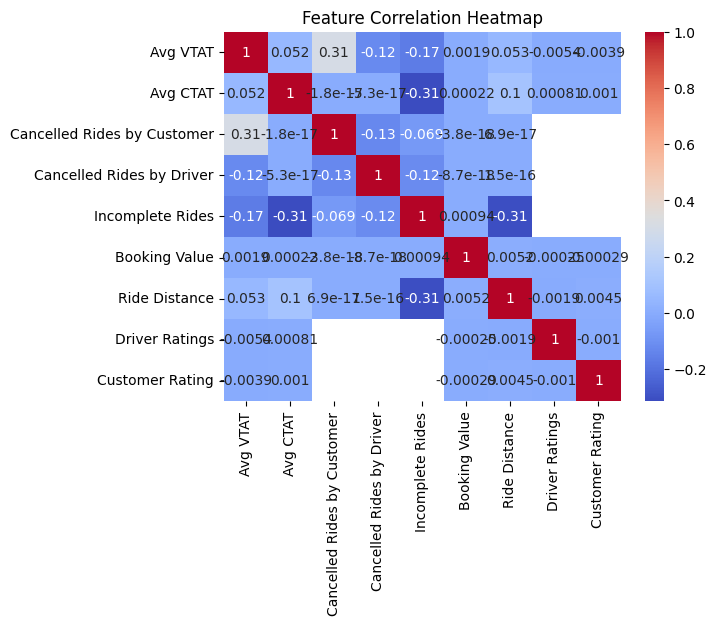

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Booking Value Distribution Across Time Zones

 To analyze how booking values vary throughout the day, we segmented the data into four time zones: Morning, Afternoon, Evening, and Late Nights.

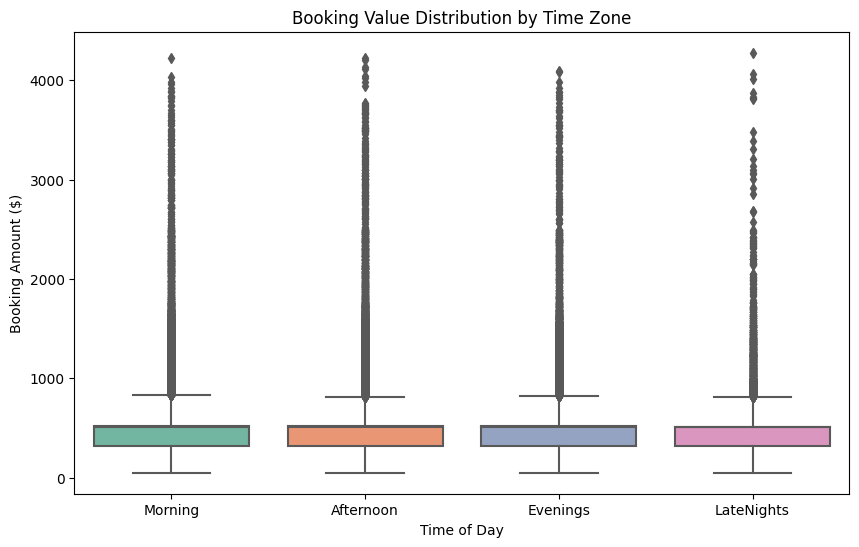

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TimeZone', y='Booking Value', data=df2, palette='Set2')
plt.title("Booking Value Distribution by Time Zone")
plt.ylabel("Booking Amount ($)")
plt.xlabel("Time of Day")
plt.show()

 The boxplot below illustrates the distribution of booking amounts for each time segment. While all time zones show a similar distribution pattern, Afternoon and Morning bookings appear to have a slightly higher median value. However, all periods contain noticeable outliers, indicating the presence of high-value bookings across all time zones.

 This insight helps in understanding peak revenue-generating periods and can support dynamic pricing or promotional strategies.

## Most Active Booking Hours

### This bar chart visualizes the number of bookings across different time zones of the day.

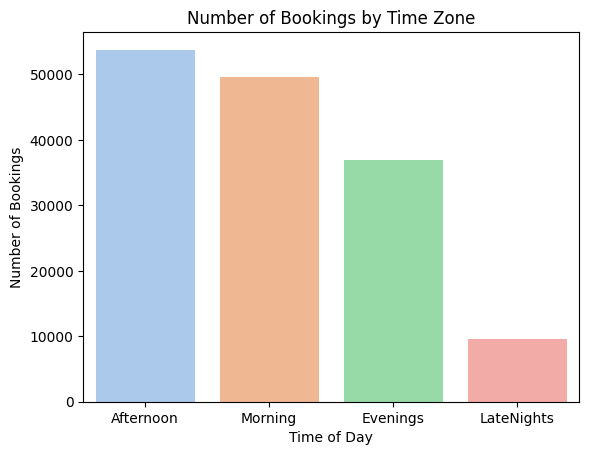

In [30]:
sns.countplot(x='TimeZone', data=df2, order=df2['TimeZone'].value_counts().index, palette='pastel')
plt.title("Number of Bookings by Time Zone")
plt.ylabel("Number of Bookings")
plt.xlabel("Time of Day")
plt.show()

 The afternoon time zone has the highest volume of bookings, followed by morning, with Late night having the least. This insight can help ride-hailing platforms better allocate driver availability and manage operational resources more efficiently.

## Most Preferred Uber Vehicle Types

 This bar chart shows the number of bookings for different Uber vehicle categories. Auto emerges as the most popular choice, followed by Go Mini and Go Sedan, indicating a strong preference for economical and compact transport options.

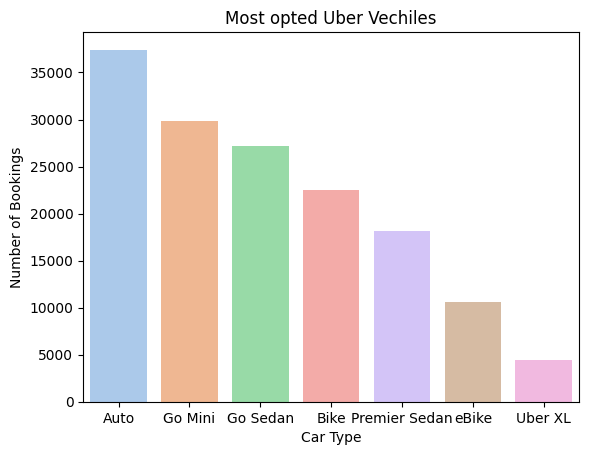

In [31]:
sns.countplot(x='Vehicle Type', data=df2, order=df2['Vehicle Type'].value_counts().index, palette='pastel')
plt.title("Most opted Uber Vechiles")
plt.ylabel("Number of Bookings")
plt.xlabel("Car Type")
plt.show()

## Top Pickup location vs Least Pickup Location

In [32]:
location_counts = df2['Pickup Location'].value_counts()

In [33]:
top_10 = location_counts.head(5)
least_10 = location_counts.tail(5)
#location_counts
print("Top 10 location", top_10)
print("Top 10 location", least_10)

Top 10 location Pickup Location
Khandsa            949
Barakhamba Road    946
Saket              931
Badarpur           921
Pragati Maidan     920
Name: count, dtype: int64
Top 10 location Pickup Location
Mandi House         800
Noida Sector 18     799
Laxmi Nagar         797
Ashok Vihar         796
Ghitorni Village    790
Name: count, dtype: int64


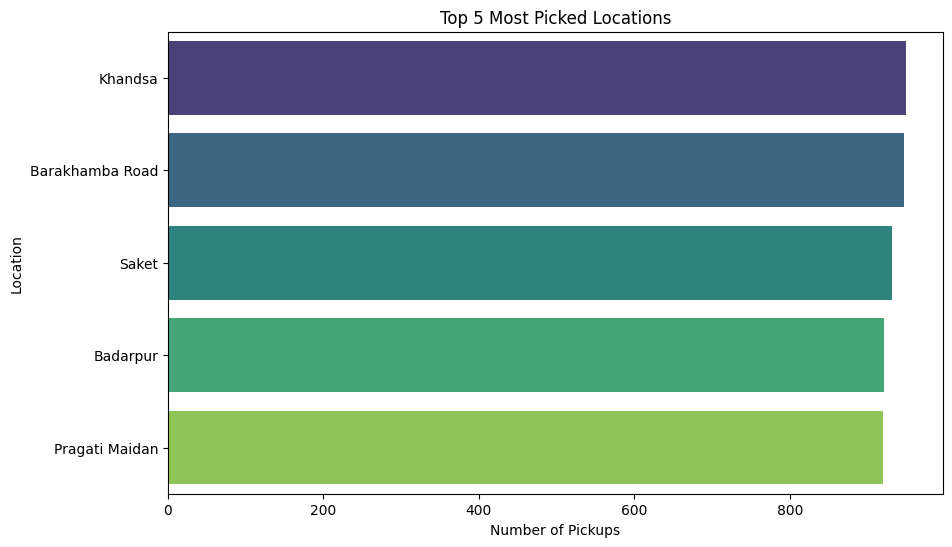

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title("Top 5 Most Picked Locations")
plt.xlabel("Number of Pickups")
plt.ylabel("Location")
plt.show()

 This chart highlights the five most frequently selected pickup locations by customers. Khandsa leads the list, followed closely by Barakhamba Road, Kanhaiya Nagar, Madipur, and Subhash Chowk.

 These locations likely represent key travel hubs or densely populated areas, indicating high demand zones. Such insights can help Uber optimize driver allocation and improve service efficiency in these regions.

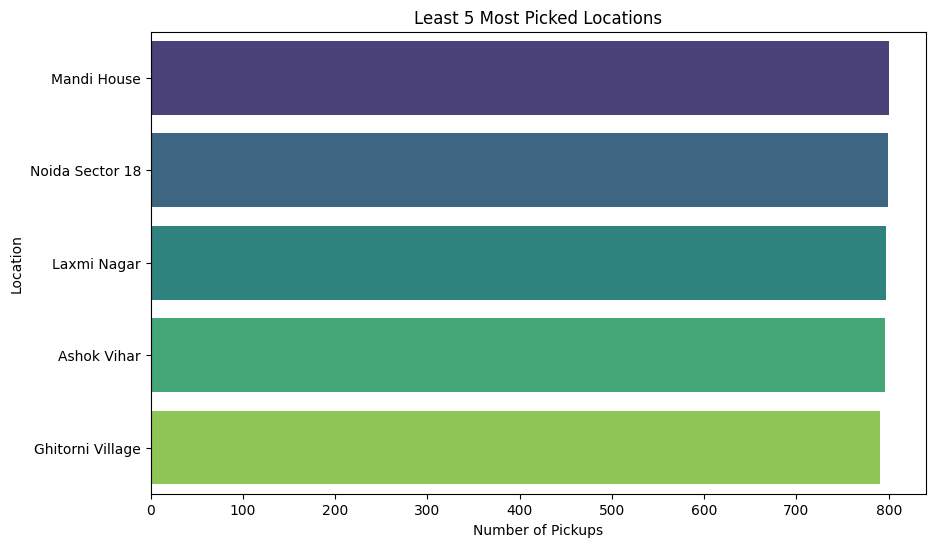

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=least_10.values, y=least_10.index, palette='viridis')
plt.title("Least 5 Most Picked Locations")
plt.xlabel("Number of Pickups")
plt.ylabel("Location")
plt.show()

 This visualization shows the five pickup points with the lowest booking counts. Faridabad Sector 15, Arjangarh, Chirag Delhi, Old Gurgaon, and Vinobapuri appear to be the least preferred or least active locations for Uber bookings.

 These areas may represent regions with lower demand, less population density, or limited Uber availability. Recognizing such zones can guide strategic expansion, marketing efforts, or fleet redistribution.

## Preferred Payment Methods for Uber Bookings

In [36]:
payment_methods = df2['Payment Method'].value_counts()

In [37]:
payment_methods

Payment Method
UPI            93909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

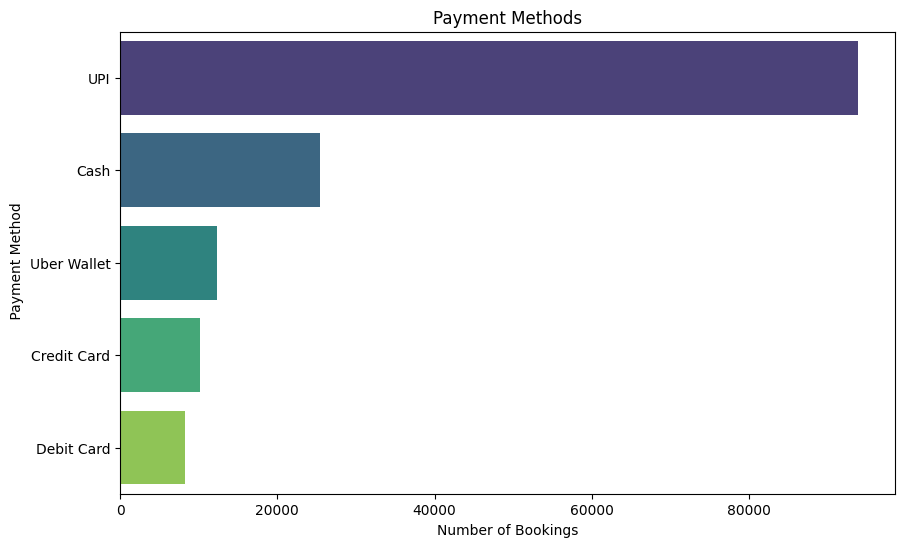

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_methods.values, y=payment_methods.index, palette='viridis')
plt.title("Payment Methods")
plt.xlabel("Number of Bookings")
plt.ylabel(" Payment Method")
plt.show()

 The majority of users prefer UPI (Unified Payments Interface) for their Uber rides, making it the most popular payment method by a significant margin. Cash payments come next, indicating a continued reliance on traditional payment methods.

 Other modes like Uber Wallet, Credit Card, and Debit Card are used by fewer users, possibly due to digital wallet preferences or ease of UPI integration.

 This insight can help Uber focus on maintaining seamless UPI support while potentially incentivizing wallet and card usage to diversify transaction channels.

## Average Time Comparison: Driver Arrival vs Trip Duration

In [39]:
#df['Avg VTAT']

In [40]:
#df['Avg CTAT']

In [41]:
avg_vtat = df2['Avg VTAT'].mean()
avg_ctat = df2['Avg CTAT'].mean()

print(f"Avg VTAT: {avg_vtat:.2f} minutes")
print(f"Avg CTAT: {avg_ctat:.2f} minutes")

Avg VTAT: 8.46 minutes
Avg CTAT: 29.15 minutes


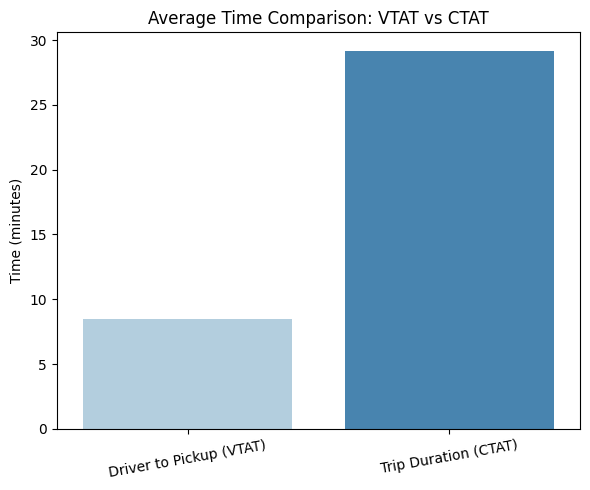

In [42]:
avg_df = pd.DataFrame({
    'Type': ['Driver to Pickup (VTAT)', 'Trip Duration (CTAT)'],
    'Avg Time (min)': [avg_vtat, avg_ctat]
})

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='Type', y='Avg Time (min)', data=avg_df, palette='Blues')
plt.title("Average Time Comparison: VTAT vs CTAT")
plt.ylabel("Time (minutes)")
plt.xlabel("")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

 This chart compares two key time metrics:

 VTAT (Vehicle to Arrival Time): The average time taken by the driver to reach the pickup location is approximately 8.46 minutes.

 CTAT (Customer Trip Arrival Time): The actual trip duration from pickup to drop-off is significantly higher, averaging around 29.15 minutes.

 The data clearly shows that while driver arrival is relatively quick, the majority of time is spent in the actual ride - an important insight for understanding operational efficiency and customer time investment.

## Ride Cancellation by Driver and Customer

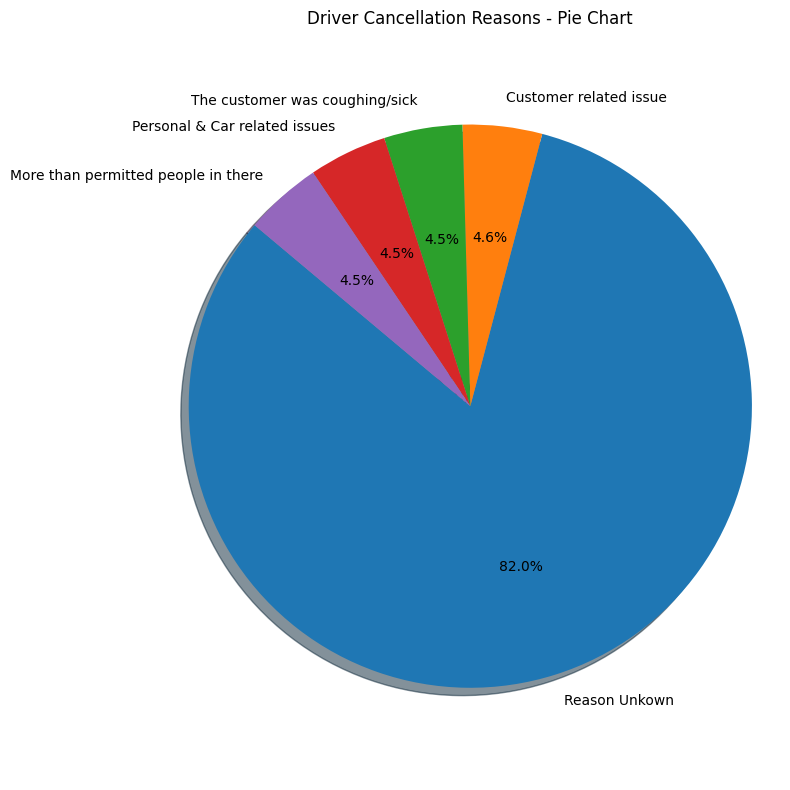

In [43]:
cancellation_counts = df2['Driver Cancellation Reason'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    cancellation_counts,
    labels=cancellation_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)

plt.title('Driver Cancellation Reasons - Pie Chart')
plt.axis('equal') 
plt.tight_layout()
plt.show()


 This pie chart visually represents the distribution of different driver cancellation reasons from your dataset.

 The largest section of the pie chart represents "Reason Unknown", indicating that the majority of driver cancellations (≈80–85%) were logged without a specified reason.

 The remaining categories are:

 Customer related issue

 The customer was coughing/sick

 Personal & Car related issues

 More than permitted people in there

 Each of these constitutes approximately 4.5%–4.6% of the total cancellations

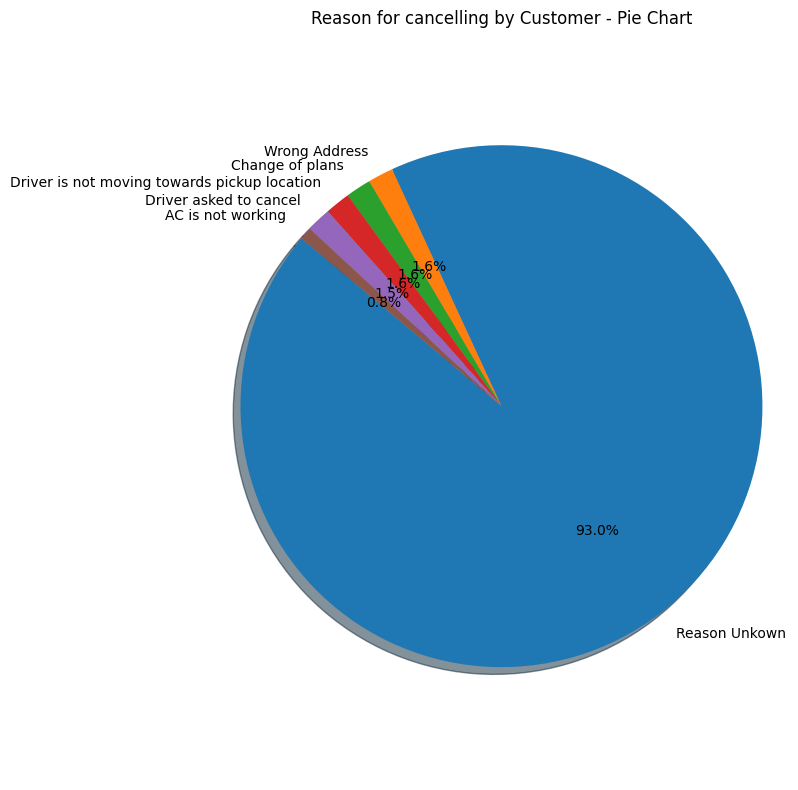

In [44]:
cancellation_counts = df2['Reason for cancelling by Customer'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    cancellation_counts,
    labels=cancellation_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)


plt.title('Reason for cancelling by Customer - Pie Chart')
plt.axis('equal')  
plt.tight_layout()
plt.show()


"Reason Unknown" dominates with 93.0% of all entries — indicating that most records had missing or unlogged cancellation reasons.

The remaining 7% of the data is distributed across specific, identifiable reasons:

Wrong Address – 1.6%

Change of plans – 1.6%

Driver not moving towards pickup location – 1.5%

Driver asked to cancel – 1.5%

AC is not working – 0.8%

## Cancellation by Time Zone

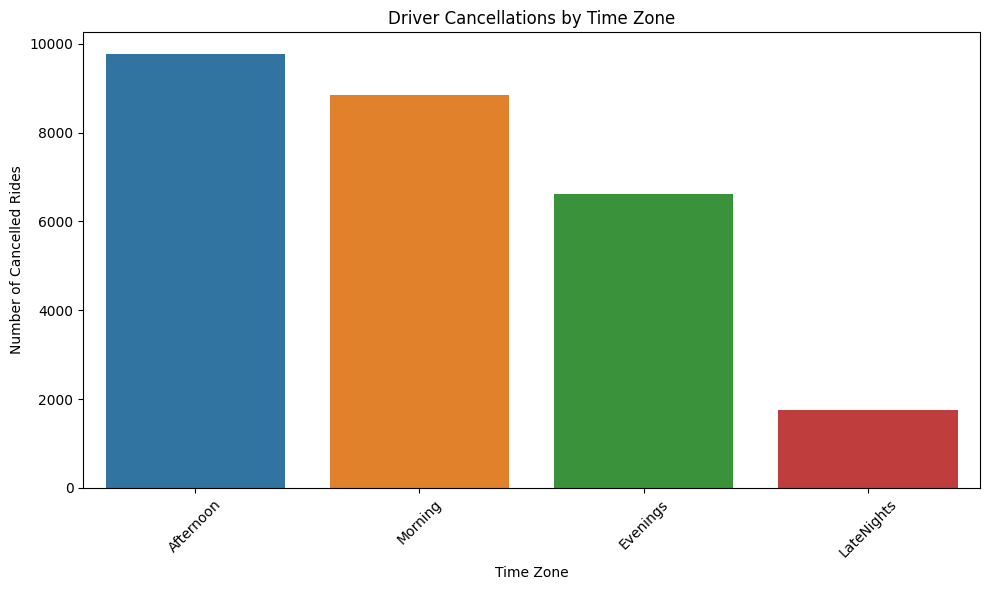

In [45]:
cancelled_df = df2[df2['Cancelled Rides by Driver'] == 1]

# Count cancellations per time zone
cancelled_counts = cancelled_df['TimeZone'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values)
plt.title('Driver Cancellations by Time Zone')
plt.xlabel('Time Zone')
plt.ylabel('Number of Cancelled Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Driver Cancellations by Time Zone (Bar Chart)

Most cancellations happen during Afternoon and Morning, followed by Evenings.

Late nights have the least driver cancellations.

This could reflect peak hours when demand is high and drivers are more likely to cancel due to traffic, fatigue, or overbooking.

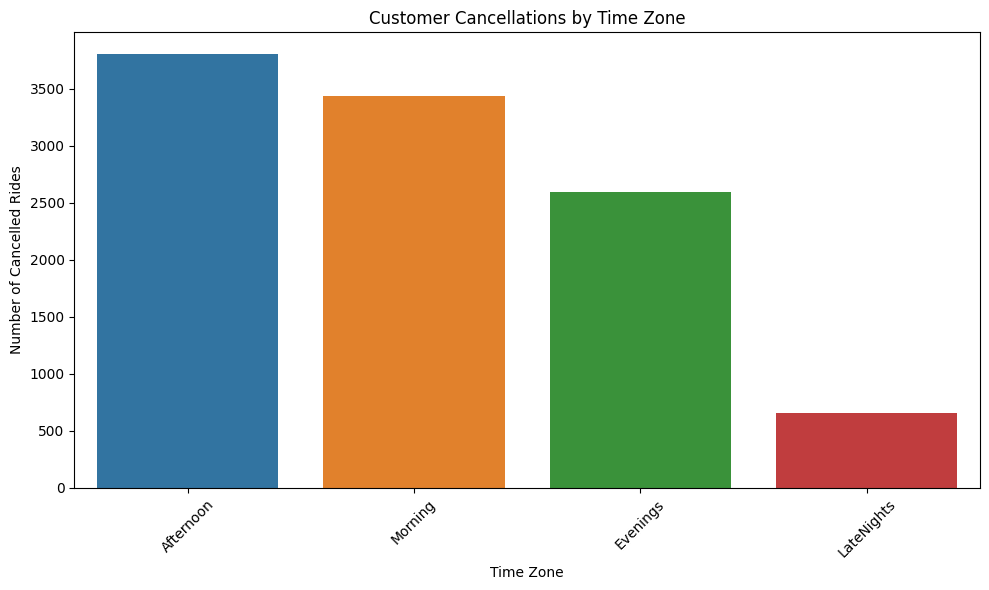

In [46]:
cancelled_df = df2[df2['Cancelled Rides by Customer'] == 1]

# Count cancellations per time zone
cancelled_counts = cancelled_df['TimeZone'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values)
plt.title('Customer Cancellations by Time Zone')
plt.xlabel('Time Zone')
plt.ylabel('Number of Cancelled Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customer Cancellations by Time Zone (Bar Chart)

Afternoon and Morning again dominate cancellation times.

The pattern resembles driver cancellation trends, suggesting common timing pressures or service mismatches during these periods.

Late nights show significantly fewer customer cancellations

# Feature Scope

### Build a machine learning model

### Build a custom Machine Learning model to predict the price